# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys
print(api_keys)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

<module 'api_keys' from '/Users/bablasawhney/Downloads/GitHub/RUTJER201901DATA3/02-Homework/06-Python-APIs/Instructions/starter_code/api_keys.py'>


## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['thompson',
 'geraldton',
 'butaritari',
 'tuatapere',
 'carnarvon',
 'namibe',
 'mataura',
 'sao%20jose%20da%20coroa%20grande',
 'lorengau',
 'mochalishche',
 'ushuaia',
 'tocopilla',
 'taolanaro',
 'dikson',
 'atuona',
 'ponta%20do%20sol',
 'crasna',
 'henties%20bay',
 'heihe',
 'faro',
 'upernavik',
 'jamestown',
 'east%20london',
 'tuktoyaktuk',
 'albany',
 'flin%20flon',
 'nishihara',
 'kamaishi',
 'yellowknife',
 'bredasdorp',
 'illoqqortoormiut',
 'vicuna',
 'port%20alfred',
 'mirabad',
 'jakarta',
 'cape%20town',
 'barrow',
 'tasiilaq',
 'kapit',
 'samusu',
 'barentsburg',
 'dahuk',
 'hermanus',
 'svetlogorsk',
 'hobart',
 'bay%20roberts',
 'busselton',
 'georgetown',
 'avarua',
 'qaqortoq',
 'amderma',
 'katherine',
 'meyungs',
 'cidreira',
 'stornoway',
 'leningradskiy',
 'mazagao',
 'omboue',
 'hastings',
 'salalah',
 'punta%20arenas',
 'bredy',
 'kapaa',
 'abyek',
 'solnechnyy',
 'saint-ambroise',
 'rikitea',
 'san%20quintin',
 'kodiak',
 'arraial%20do%20cabo',
 'tankara',

In [37]:
len(cities)

587

In [38]:
api_key = "23ae0640048b80fa8931682445559061"

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
record = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")


for city in cities:  
    try: 
#         city_url = url + city
#         print(city_url)
        response = requests.get(f"{url}&q={city}").json() 
       
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        record= record + 1
        time.sleep(1.00)
        
    
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=thompson
Processing Record 2 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=geraldton
Processing Record 3 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=butaritari
Processing Record 4 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=tuatapere
Processing Record 5 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=carnarvon
Processing Record 6 | Namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=namibe
Processing Record 7 | Mataura
http://api.openweathermap.org/data/2.5/weather?un

Processing Record 56 | Solnechnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=solnechnyy
Processing Record 57 | Saint-Ambroise
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=saint-ambroise
Processing Record 58 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=rikitea
Processing Record 59 | San Quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=san%20quintin
Processing Record 60 | Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=kodiak
Processing Record 61 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=arraial%20do%20cabo
Processing Record 62 | Tankara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2

Processing Record 112 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=saint-philippe
City not found. Skipping...
Processing Record 113 | San Patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=san%20patricio
Processing Record 114 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=severo-kurilsk
Processing Record 115 | Dudinka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=dudinka
Processing Record 116 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=bluff
Processing Record 117 | Agadir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=agadir
Processing Record 118 | Bima
http://api.openweathermap.org/data/2.5/weather?unit

Processing Record 167 | Naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=naze
Processing Record 168 | Garmsar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=garmsar
Processing Record 169 | Belmonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=belmonte
Processing Record 170 | Gushikawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=gushikawa
Processing Record 171 | Ardakan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=ardakan
Processing Record 172 | San Martin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=san%20martin
Processing Record 173 | Isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q

City not found. Skipping...
Processing Record 222 | Songkhla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=songkhla
Processing Record 223 | Najran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=najran
Processing Record 224 | Sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=sur
Processing Record 225 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=bethel
Processing Record 226 | Mocuba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=mocuba
Processing Record 227 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=nanortalik
Processing Record 228 | Mutoko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa89316

Processing Record 278 | Borgarnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=borgarnes
City not found. Skipping...
Processing Record 279 | Poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=poum
Processing Record 280 | Kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=kirakira
Processing Record 281 | Ambilobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=ambilobe
Processing Record 282 | Moranbah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=moranbah
Processing Record 283 | Backa Topola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=backa%20topola
Processing Record 284 | Francistown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing Record 333 | Ocampo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=ocampo
Processing Record 334 | La Serena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=la%20serena
Processing Record 335 | Andradina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=andradina
Processing Record 336 | Palana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=palana
Processing Record 337 | Dawei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=dawei
Processing Record 338 | Roald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=roald
Processing Record 339 | Pinyug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=pinyug
Pro

Processing Record 389 | Feijo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=feijo
Processing Record 390 | Cordoba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=cordoba
Processing Record 391 | Yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=yumen
Processing Record 392 | Pombas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=pombas
Processing Record 393 | Northam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=northam
Processing Record 394 | Kyren
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=kyren
Processing Record 395 | Sao Filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=sao%20filipe
Proce

Processing Record 444 | Puerto Escondido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=puerto%20escondido
Processing Record 445 | Antropovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=antropovo
Processing Record 446 | Aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=aykhal
Processing Record 447 | Sungairaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=sungairaya
Processing Record 448 | Porto Novo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=porto%20novo
Processing Record 449 | Voh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=voh
Processing Record 450 | Talara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80f

Processing Record 500 | Kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=kavaratti
Processing Record 501 | Jiangkou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=jiangkou
Processing Record 502 | Vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=vao
Processing Record 503 | Kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=kutum
Processing Record 504 | Cabo San Lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=cabo%20san%20lucas
Processing Record 505 | Buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa8931682445559061&q=buala
Processing Record 506 | Mahibadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ae0640048b80fa893168244555906

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
weatherdict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}


weather_data = pd.DataFrame(weatherdict)


weather_data.count()

City          529
Cloudiness    529
Country       529
Date          529
Humidity      529
Lat           529
Lng           529
Max Temp      529
Wind Speed    529
dtype: int64

In [41]:
weather_data.to_csv('weather_data.csv')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Thompson,40,CA,1560443204,42,55.74,-97.86,66.20,4.70
1,Geraldton,75,CA,1560443205,48,49.72,-86.95,60.80,6.93
2,Butaritari,100,KI,1560443206,81,3.07,172.79,84.12,17.02
3,Tuatapere,100,NZ,1560443207,95,-46.13,167.69,42.01,4.36
4,Carnarvon,0,ZA,1560443208,23,-30.97,22.13,52.62,7.20


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

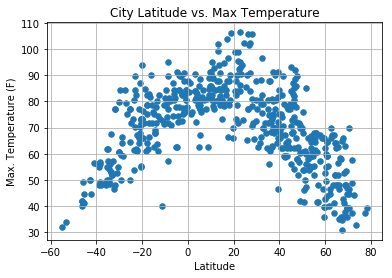

In [45]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=30)

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_Temperature_Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

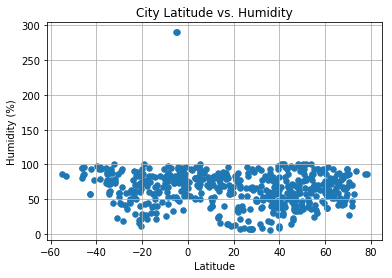

In [47]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=30)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_Humidity_Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

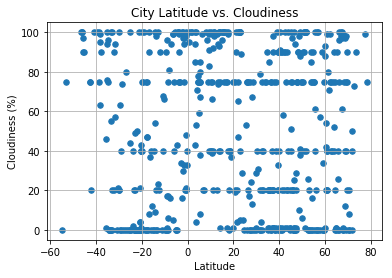

In [48]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=30)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_Cloudiness_Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

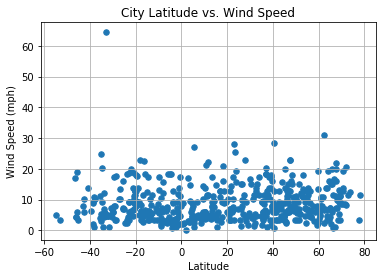

In [49]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=30)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_Wind_Speed_Plot.png")
plt.show()